# Name- Rhea Simon
##  Prediction using Decision Tree Algorithm

Step 1 : Importing Libraries and IRIS Data

In [14]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

y=iris.target
print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Step 2: Seperating Features and Targe

In [15]:
# X Features
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
# y Target
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

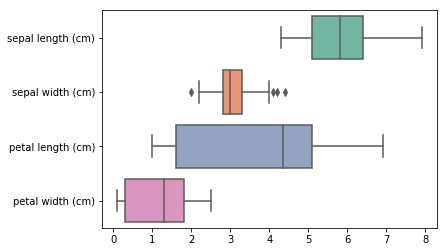

In [17]:
sns.boxplot(data=df, orient="h", palette="Set2")

In [18]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


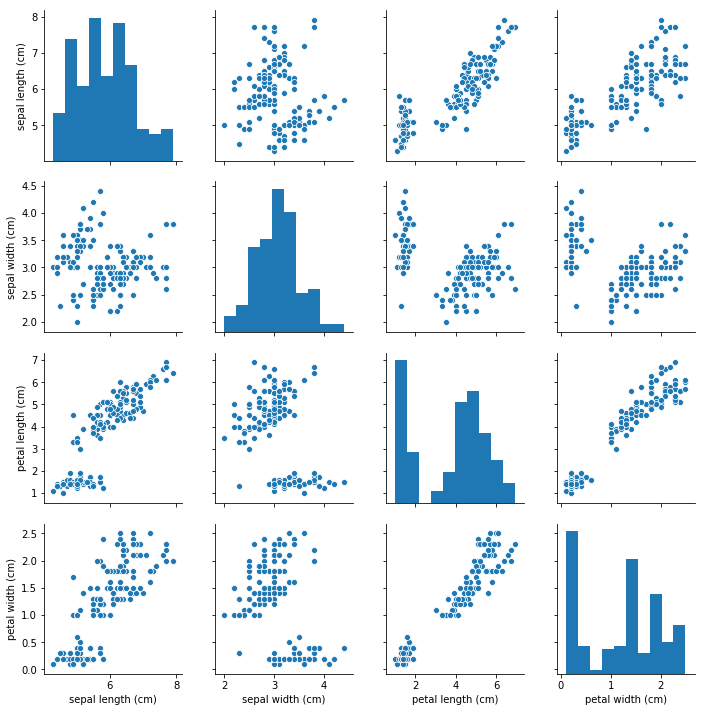

In [19]:
sns.pairplot(df);

## Decision Tree Algorithm

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.30, random_state = 0)

In [21]:
X_train.shape, y_train.shape

((105, 4), (105,))

In [22]:
X_test.shape, y_test.shape

((45, 4), (45,))

In [23]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [24]:
dtree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
predictions = dtree.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
print("confusion_matrix :-\n",confusion_matrix(y_test,predictions))

print("\nclassification_report :- \n",classification_report(y_test,predictions))

confusion_matrix :-
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]

classification_report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Visualize the Decision Tree to understand it better.

In [28]:
import os

os.environ['PATH']=os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

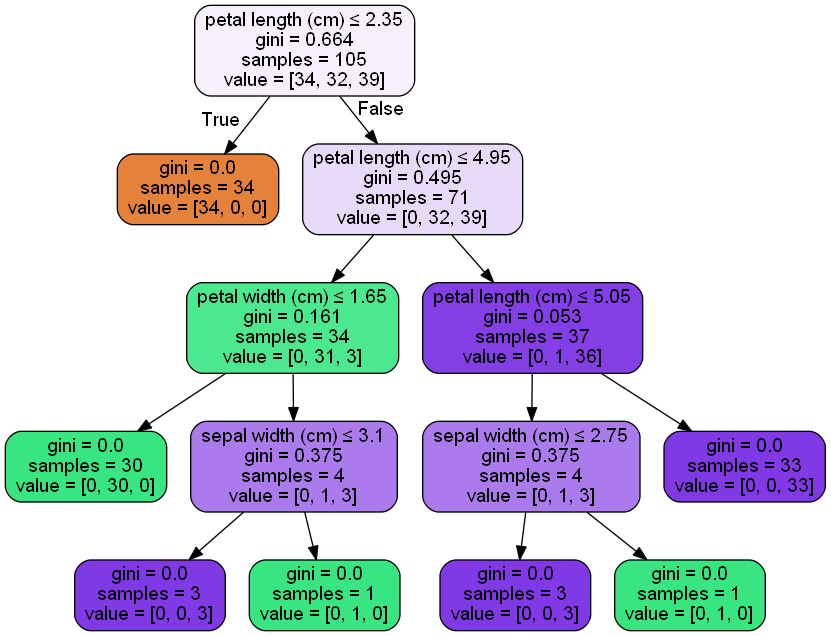

In [29]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [35]:
feature_labels=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for feature in zip(feature_labels,dtree.feature_importances_):
    print(feature)

('SepalLengthCm', 0.0)
('SepalWidthCm', 0.04300928454396505)
('PetalLengthCm', 0.90006666238314)
('PetalWidthCm', 0.056924053072894935)


In [38]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [39]:
dtree.predict([[5.2,2.9,1.8,0.6]])

array([0])

 #### New value belong to species 0 means that is Setosa